In [1]:
from fastai.callback.mixup import *
from fastai.vision.all import *

from src.learner import get_learner_task2
from src.utils import (
    load_configuration,
    create_submission,
    save_clean_labels,
    do_fit
)

# Initial train + Cleaning

In [2]:
config  = load_configuration('configs/config_task2_224.yml')
learn = get_learner_task2(config)
cbs = [MixUp()]

In [3]:
do_fit(learn, 'task2_resnet50', epochs=10, lr=1e-3, pct_start=0.75, cbs=cbs)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,3.290034,2.218958,0.574000,0.864100,04:24
1,3.061201,2.070771,0.606600,0.892900,04:22
2,2.979143,2.017712,0.614200,0.903100,04:23
3,2.972781,1.997989,0.614800,0.907300,04:23
4,2.950619,1.967613,0.627300,0.912900,04:22
5,2.886545,1.965593,0.626100,0.911800,04:22
6,2.889034,1.955934,0.631000,0.912600,04:21
7,2.845558,1.937659,0.630400,0.916900,04:21
8,2.833878,1.901422,0.643300,0.921700,04:22
9,2.787606,1.888829,0.646700,0.923200,04:21


Better model found at epoch 0 with valid_loss value: 2.2189576625823975.
Better model found at epoch 1 with valid_loss value: 2.0707709789276123.
Better model found at epoch 2 with valid_loss value: 2.017711639404297.
Better model found at epoch 3 with valid_loss value: 1.997989296913147.
Better model found at epoch 4 with valid_loss value: 1.9676131010055542.
Better model found at epoch 5 with valid_loss value: 1.9655927419662476.
Better model found at epoch 6 with valid_loss value: 1.9559344053268433.
Better model found at epoch 7 with valid_loss value: 1.9376587867736816.
Better model found at epoch 8 with valid_loss value: 1.9014222621917725.
Better model found at epoch 9 with valid_loss value: 1.8888287544250488.


In [3]:
learn.load('task2_resnet50')

In [4]:
learn.unfreeze()

In [5]:
do_fit(learn, 'task2_resnet50_unfrozen', epochs=5, lr=1e-5, pct_start=0.75, cbs=cbs)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.712714,1.877953,0.650600,0.925300,05:13
1,2.639484,1.861825,0.649800,0.928800,05:15
2,2.603803,1.851239,0.655300,0.930600,05:11
3,2.605401,1.848106,0.654600,0.930000,05:12
4,2.575114,1.838914,0.657000,0.933600,05:13


Better model found at epoch 0 with valid_loss value: 1.8779529333114624.
Better model found at epoch 1 with valid_loss value: 1.8618253469467163.
Better model found at epoch 2 with valid_loss value: 1.8512388467788696.
Better model found at epoch 3 with valid_loss value: 1.8481056690216064.
Better model found at epoch 4 with valid_loss value: 1.8389140367507935.


In [6]:
%time save_clean_labels(learn, config)

CPU times: total: 15min 55s
Wall time: 2min 55s


# Training with cleaned labels 

In [2]:
config  = load_configuration('configs/config_task2_224_clean.yml')
learn = get_learner_task2(config)
cbs = [MixUp()]

In [3]:
learn.dls.train.n + learn.dls.valid.n

40785

In [4]:
do_fit(learn, 'task2_resnet50_clean', epochs=15, lr=1e-3, pct_start=0.75, cbs=cbs)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,3.205650,1.869166,0.713743,0.896776,03:27
1,2.947233,1.759174,0.738997,0.904131,03:24
2,2.816493,1.697239,0.754199,0.917004,03:24
3,2.764798,1.658849,0.761064,0.922521,03:23
4,2.738062,1.629439,0.766213,0.923501,03:23
5,2.689612,1.613992,0.775653,0.923624,03:22
6,2.656112,1.592184,0.779453,0.928650,03:22
7,2.662449,1.597839,0.782641,0.924972,03:22
8,2.639916,1.587357,0.782886,0.926934,03:22
9,2.650651,1.566705,0.789874,0.933554,03:22


Better model found at epoch 0 with valid_loss value: 1.869166374206543.
Better model found at epoch 1 with valid_loss value: 1.7591744661331177.
Better model found at epoch 2 with valid_loss value: 1.6972391605377197.
Better model found at epoch 3 with valid_loss value: 1.658848524093628.
Better model found at epoch 4 with valid_loss value: 1.629439353942871.
Better model found at epoch 5 with valid_loss value: 1.61399245262146.
Better model found at epoch 6 with valid_loss value: 1.5921838283538818.
Better model found at epoch 8 with valid_loss value: 1.5873574018478394.
Better model found at epoch 9 with valid_loss value: 1.5667052268981934.
Better model found at epoch 11 with valid_loss value: 1.5651285648345947.
Better model found at epoch 12 with valid_loss value: 1.53287672996521.
Better model found at epoch 13 with valid_loss value: 1.5085675716400146.
Better model found at epoch 14 with valid_loss value: 1.5071388483047485.


In [5]:
learn.unfreeze()

SuggestedLRs(valley=5.248074739938602e-05)

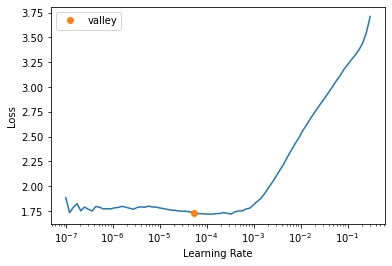

In [6]:
learn.lr_find()

In [7]:
do_fit(
    learn, 
    'task2_resnet50_unfrozen_clean', 
    epochs=10, 
    lr=1e-5, 
    pct_start=0.75, 
    cbs=cbs,
    save_state_dict=True
)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.497872,1.499305,0.808631,0.937722,04:08
1,2.438420,1.489096,0.807650,0.938948,04:06
2,2.445873,1.477443,0.812431,0.939929,04:06
3,2.430301,1.471180,0.813657,0.940787,04:06
4,2.411537,1.468213,0.819419,0.940174,04:06
5,2.411072,1.459472,0.818806,0.941032,04:06
6,2.386423,1.461351,0.816354,0.940419,04:06
7,2.379391,1.455381,0.818316,0.939806,04:06
8,2.333617,1.445452,0.823097,0.942136,04:06
9,2.336682,1.442323,0.823097,0.942381,04:06


Better model found at epoch 0 with valid_loss value: 1.4993046522140503.
Better model found at epoch 1 with valid_loss value: 1.4890955686569214.
Better model found at epoch 2 with valid_loss value: 1.4774428606033325.
Better model found at epoch 3 with valid_loss value: 1.4711798429489136.
Better model found at epoch 4 with valid_loss value: 1.4682130813598633.
Better model found at epoch 5 with valid_loss value: 1.4594720602035522.
Better model found at epoch 7 with valid_loss value: 1.4553807973861694.
Better model found at epoch 8 with valid_loss value: 1.4454518556594849.
Better model found at epoch 9 with valid_loss value: 1.4423234462738037.


# Creating the submission 

In [2]:
%%time

create_submission(
    path_learn='task2_resnet50_unfrozen_clean.pkl',
    path_test_images='data/task2/val_data',
    submission_name='task2.csv'
)

CPU times: total: 1min 7s
Wall time: 18.8 s
